# Part 1 Data Preprocessing

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import the dataset

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# to check how many columns are categorical and numerical

data.select_dtypes(include='object').columns


Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [5]:
len(data.select_dtypes(include='object').columns)

3

In [6]:
data.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
len(data.select_dtypes(include=['int64','float64']).columns)

11

In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing data

In [9]:
data.isnull().values.any()

False

In [10]:
data.isnull().values.sum()

0

## Encode the categorical data

In [11]:
data.select_dtypes(include='object').columns


Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [12]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
data['Geography'] = data['Geography'].map({'France':0,'Spain':1,'Germany':2})
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,1,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,1,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
data['Gender'] = data['Gender'].map({'Female':0, 'Male':1})
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


## CountPlot

C:\Users\esha.kak\.conda\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

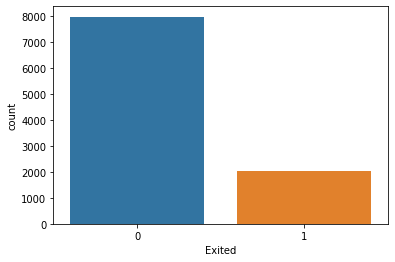

In [19]:
sns.countplot(data['Exited'])
plt.plot

In [20]:
## Customers staying with the bank

(data.Exited == 0).sum()

7963

In [21]:
## Customers who left

(data.Exited == 1).sum()

2037

## Correlation matrix and HeatMaps

In [22]:
dataset_2 = data.drop(columns='Exited')
dataset_2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,2,1,42,3,75075.31,2,1,0,92888.52


<AxesSubplot:title={'center':'Correlated with Exited'}>

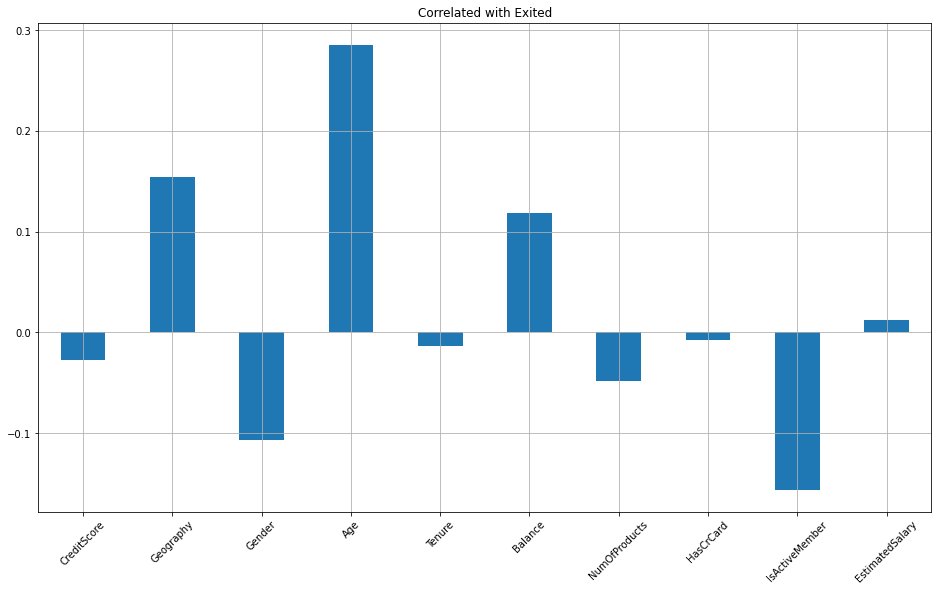

In [23]:
dataset_2.corrwith(data['Exited']).plot.bar(
    figsize=(16,9) , title='Correlated with Exited' , rot=45 , grid=True
)

In [24]:
corr = data.corr()

<AxesSubplot:>

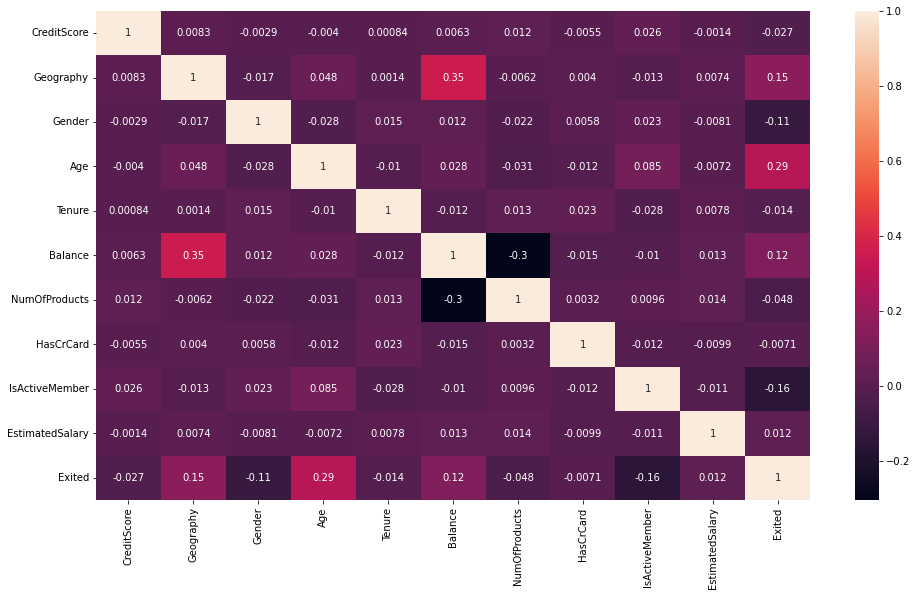

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(corr , annot=True)

## Spilitting the data

In [26]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [27]:
# independent/Matrix of Features
x = data.drop(columns='Exited')
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,2,1,42,3,75075.31,2,1,0,92888.52


In [28]:
# Target / Dependent variable
y = data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train , x_test , y_train , y_test = train_test_split( x, y, test_size=0.2, random_state=0)

In [31]:
x_train.shape

(8000, 10)

In [32]:
x_test.shape

(2000, 10)

In [33]:
y_train.shape

(8000,)

In [34]:
y_test.shape

(2000,)

## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()

In [37]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [38]:
x_train

array([[ 0.16958176,  0.31701997, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  1.52644283,  0.91601335, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.89240289, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.89240289,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521,  0.31701997, -1.09168714, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  1.52644283, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [39]:
x_test

array([[-0.56129438,  1.42849887, -1.11339196, ...,  0.66011376,
         0.97628121,  1.62185911],
       [-1.33847768, -0.94442284, -1.11339196, ...,  0.66011376,
        -1.02429504,  0.504204  ],
       [ 0.58347561,  0.24203801, -1.11339196, ...,  0.66011376,
         0.97628121, -0.41865644],
       ...,
       [-0.76084144,  0.24203801,  0.8981563 , ...,  0.66011376,
        -1.02429504,  0.72775202],
       [-0.0046631 ,  1.42849887,  0.8981563 , ...,  0.66011376,
         0.97628121, -1.54162886],
       [-0.81335383,  1.42849887,  0.8981563 , ...,  0.66011376,
        -1.02429504,  1.62356528]])

# Part 2 - Build the Model

## 1 ) Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
classifier_lr = LogisticRegression(random_state=0)

In [42]:
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [43]:
y_pred = classifier_lr.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix , f1_score , recall_score

In [45]:
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

In [46]:
results = pd.DataFrame([['Logistic Regression' , acc, pre, f1,rec]],
                      columns=['Model','Accuracy' , 'Precision' ,'F1' , 'Recall']
                      )

In [47]:
results

,Model,Accuracy,Precision,F1,Recall
0,Logistic Regression,0.812,0.612403,0.29588,0.195062


In [48]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1545,   50],
       [ 326,   79]], dtype=int64)

### Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier_lr , X = x_train , y = y_train , cv=10)


print("Accuracy is {:2f} % ".format(accuracies.mean()*100))
print("Standard Deviation is {:2f} % ".format(accuracies.std()*100))

Accuracy is 81.062500 % 
Standard Deviation is 0.789086 % 


## 2) Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
classifier_rf = RandomForestClassifier(random_state=0)

In [52]:
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [53]:
y_pred = classifier_rf.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix , f1_score , recall_score

acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

model_results = pd.DataFrame([['Random Forest' , acc, pre, f1,rec]],
                      columns=['Model','Accuracy' , 'Precision' ,'F1' , 'Recall']
                      )

In [55]:
results = results.append(model_results, ignore_index=True)
results

C:\Users\esha.kak\AppData\Local\Temp\ipykernel_14524\2978437290.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,Precision,F1,Recall
0,Logistic Regression,0.8120,0.612403,0.295880,0.195062
1,Random Forest,0.8675,0.744755,0.616498,0.525926


In [56]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1522,   73],
       [ 192,  213]], dtype=int64)

### Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier_rf , X = x_train , y = y_train , cv=10)


print("Accuracy is {:2f} % ".format(accuracies.mean()*100))
print("Standard Deviation is {:2f} % ".format(accuracies.std()*100))

Accuracy is 86.025000 % 
Standard Deviation is 1.025914 % 


## 3) XGBoost Classification

In [59]:
from xgboost import XGBClassifier

In [60]:
classifier_xgb = XGBClassifier()

In [61]:
classifier_xgb.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
y_pred = classifier_xgb.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix , f1_score , recall_score

acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

model_results = pd.DataFrame([['XGBooster' , acc, pre, f1,rec]],
                      columns=['Model','Accuracy' , 'Precision' ,'F1' , 'Recall']
                      )

In [64]:
results = results.append(model_results, ignore_index=True)
results

C:\Users\esha.kak\AppData\Local\Temp\ipykernel_14524\2978437290.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,Precision,F1,Recall
0,Logistic Regression,0.8120,0.612403,0.295880,0.195062
1,Random Forest,0.8675,0.744755,0.616498,0.525926
2,XGBooster,0.8535,0.680645,0.590210,0.520988


In [65]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1496,   99],
       [ 194,  211]], dtype=int64)

In [66]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier_xgb , X = x_train , y = y_train , cv=10)


print("Accuracy is {:2f} % ".format(accuracies.mean()*100))
print("Standard Deviation is {:2f} % ".format(accuracies.std()*100))

Accuracy is 85.200000 % 
Standard Deviation is 1.238951 % 


# Part 3 : Randomized search to find the best parameter (XGBoost Classifier)

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
parametrs = {
    'learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,9,10,11,12],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [70]:
parametrs

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [73]:
randomized_search = RandomizedSearchCV(estimator = classifier_xgb , param_distributions = parametrs , n_iter = 5 
                                       , n_jobs = -1 , scoring = 'roc_auc', cv=5 , verbose = 3 )

In [74]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [75]:
randomized_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [78]:
randomized_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [80]:
randomized_search.best_score_

0.8611204366447012

# Part 4) Final Model (XGBoost Classifier)

In [82]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1,)
classifier.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [84]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score , precision_score , confusion_matrix , f1_score , recall_score

acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

model_results = pd.DataFrame([['Final XGBoost' , acc, pre, f1,rec]],
                      columns=['Model','Accuracy' , 'Precision' ,'F1' , 'Recall']
                      )

In [85]:
results = results.append(model_results, ignore_index=True)
results

C:\Users\esha.kak\AppData\Local\Temp\ipykernel_14524\2978437290.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,Precision,F1,Recall
0,Logistic Regression,0.8120,0.612403,0.295880,0.195062
1,Random Forest,0.8675,0.744755,0.616498,0.525926
2,XGBooster,0.8535,0.680645,0.590210,0.520988
3,Final XGBoost,0.8630,0.720539,0.609687,0.528395


In [86]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1512,   83],
       [ 191,  214]], dtype=int64)

#### Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier_xgb , X = x_train , y = y_train , cv=10)


print("Accuracy is {:2f} % ".format(accuracies.mean()*100))
print("Standard Deviation is {:2f} % ".format(accuracies.std()*100))

Accuracy is 85.200000 % 
Standard Deviation is 1.238951 % 


# Part 5 Predict a single observation

In [88]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [92]:
single_obs = [[625, 1,1,34,5,12500.01,3,1,101234.90,1]]

In [93]:
single_obs

[[625, 1, 1, 34, 5, 12500.01, 3, 1, 101234.9, 1]]

In [94]:
classifier.predict(sc.transform(single_obs))

C:\Users\esha.kak\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [95]:
## Customer is staying with the Bank